In [2]:
import numpy as np
from matplotlib import pyplot as plt

import sys
sys.path.insert(0, '/home/sahre/git_repositories/APDFT/prototyping/atomic_energies/')
sys.path.insert(0, '/home/sahre/git_repositories/APDFT/prototyping/atomic_energies/hitp')
import cpmd_io

In [9]:
def get_etot(logfile):
    with open(logfile, 'r') as f:
        e_tot = 0
        for line in f:
            if "TOTAL ENERGY" in line:
                e_tot = float(line.split()[-2])
    return(e_tot)

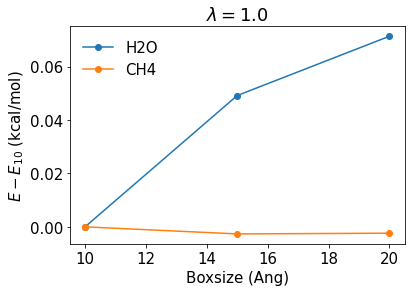

In [39]:
e_tot = {'H2O':[], 'CH4':[]}

for comp in e_tot.keys():
    for boxsize in [10, 15, 20]:

        logfile = f'/data/sahre/projects/finite_differences/boxsize/{comp}_{boxsize}/run.log'
        e_tot[comp].append(get_etot(logfile))
    e_tot[comp] = np.array(e_tot[comp])*630

plt.rcParams['font.size'] = 15
boxsizes = [10, 15, 20]
plt.plot(boxsizes, e_tot['H2O']-e_tot['H2O'][0], '-o', label = 'H2O')
plt.plot(boxsizes, e_tot['CH4']-e_tot['CH4'][0], '-o', label = 'CH4')

plt.xlabel('Boxsize (Ang)')
plt.ylabel(r'$E-E_{10}$ (kcal/mol)')
plt.title('$\lambda = 1.0$')
plt.legend(frameon=False)

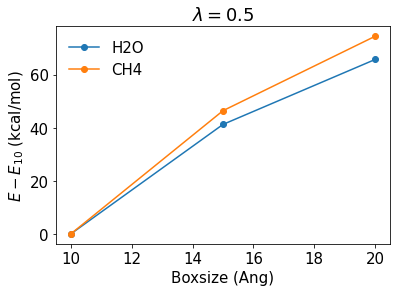

In [40]:
e_tot = {'H2O':[], 'CH4':[]}

for comp in e_tot.keys():
    for boxsize in [10, 15, 20]:

        logfile = f'/data/sahre/projects/finite_differences/boxsize/{comp}_{boxsize}_lam0.5/run.log'
        e_tot[comp].append(get_etot(logfile))
    e_tot[comp] = np.array(e_tot[comp])*630

plt.rcParams['font.size'] = 15
boxsizes = [10, 15, 20]
plt.plot(boxsizes, e_tot['H2O']-e_tot['H2O'][0], '-o', label = 'H2O')
plt.plot(boxsizes, e_tot['CH4']-e_tot['CH4'][0], '-o', label = 'CH4')

plt.xlabel('Boxsize (Ang)')
plt.ylabel(r'$E-E_{10}$ (kcal/mol)')
plt.title('$\lambda = 0.5$')
plt.legend(frameon=False)